In [2]:
from google.colab import files
uploaded = files.upload()

Saving mock_kaggle.csv to mock_kaggle.csv


In [3]:
!pip install prophet

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [5]:
df = pd.read_csv("mock_kaggle.csv")

df.head()


,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [6]:
df['data'] = pd.to_datetime(df['data'])
df = df.sort_values('data')

df.isnull().sum()
df = df.fillna(method='ffill')

/tmp/ipython-input-941277589.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [7]:
df_prophet = df[['data', 'venda']]
df_prophet.columns = ['ds', 'y']

df_prophet.head()

,ds,y
0,2014-01-01,0
1,2014-01-02,70
2,2014-01-03,59
3,2014-01-04,93
4,2014-01-05,96


In [8]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

model.fit(df_prophet)

In [9]:
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)

forecast[['ds', 'yhat']].tail()


,ds,yhat
992,2016-09-25,199.979535
993,2016-09-26,173.217613
994,2016-09-27,171.941466
995,2016-09-28,197.040619
996,2016-09-29,182.278030


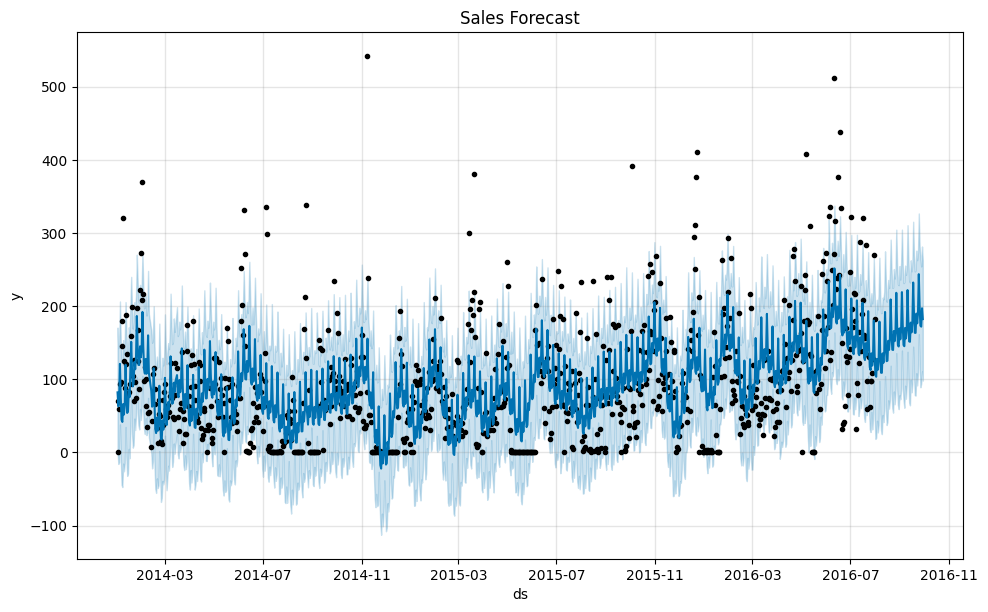

In [10]:
model.plot(forecast)
plt.title("Sales Forecast")
plt.show()

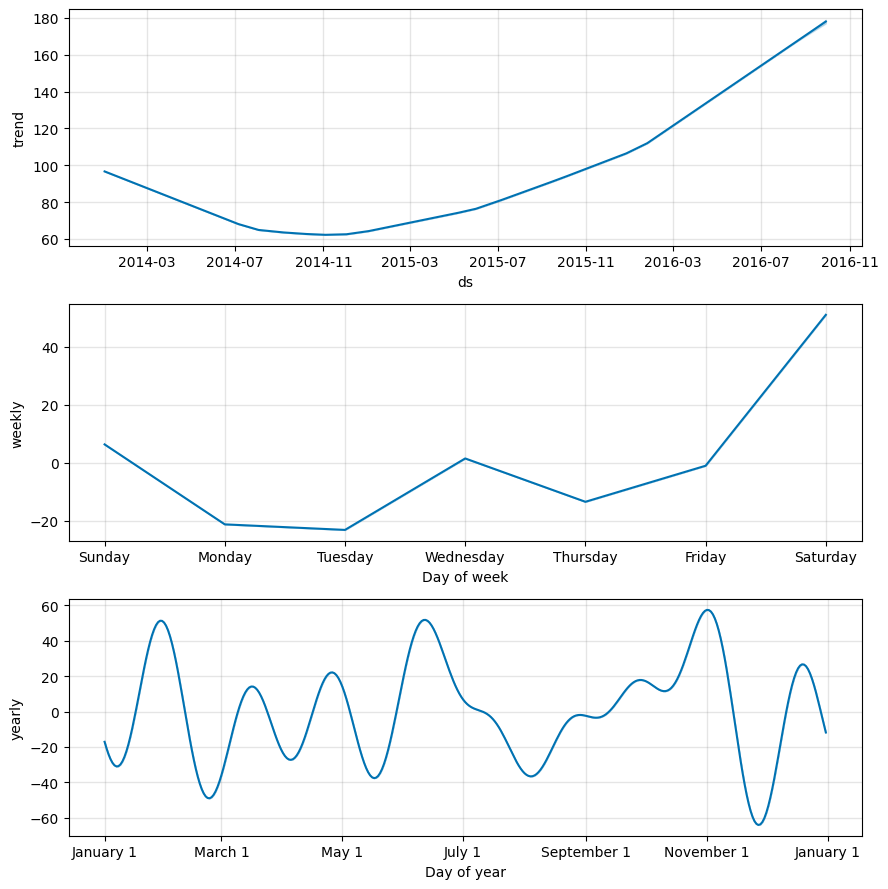

In [11]:
model.plot_components(forecast)
plt.show()

In [12]:
forecast[['ds', 'yhat']].to_csv("forecast.csv", index=False)

In [13]:
files.download("forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>